In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import os
import glob
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import geopandas as gpd
import pandas as pd
import rioxarray as rio
import xarray as xr
from pyproj import Proj, transform
import sys
sys.path.insert(1, 'Digital-Twins')
sys.path.insert(1, 'Tools')
from src.digitaltwin import setup_environment
from src.lidar import dem_metadata_in_db
from dea_tools.plotting import display_map, rgb

In [3]:
catchment_boundary = dem_metadata_in_db.get_catchment_boundary()
geometry = str(catchment_boundary["geometry"][0])
engine = setup_environment.get_database()
query = "SELECT * FROM model_output WHERE geometry = geometry"
output_data = pd.read_sql_query(query, engine)
output_path = pathlib.Path(output_data['filepath'].values[-1])
print('The latest flood model output path:', output_path)

INFO:2023-02-02 03:02:17,853:src.digitaltwin.setup_environment:Connected to PostgreSQL database!


The latest flood model output path: /home/jovyan/datastorage/model_output/output_2023_02_02_01_18_28.nc


In [4]:
ds = xr.open_dataset(output_path)
ds

<xarray.Dataset>
Dimensions:      (time: 10, blockid: 1728, xx_P0: 768, yy_P0: 576)
Coordinates:
  * time         (time) float32 0.0 100.0 200.0 300.0 ... 700.0 800.0 900.0
  * blockid      (blockid) int32 0 1 2 3 4 5 6 ... 1722 1723 1724 1725 1726 1727
  * xx_P0        (xx_P0) float64 1.569e+06 1.569e+06 ... 1.577e+06 1.577e+06
  * yy_P0        (yy_P0) float64 5.193e+06 5.193e+06 ... 5.199e+06 5.199e+06
Data variables:
    blockxo      (blockid) float32 ...
    blockyo      (blockid) float32 ...
    blockwidth   (blockid) float32 ...
    blocklevel   (blockid) int32 ...
    blockstatus  (blockid) int32 ...
    h_P0         (time, yy_P0, xx_P0) float32 ...
    hmax_P0      (time, yy_P0, xx_P0) float32 ...
    zb_P0        (time, yy_P0, xx_P0) float32 ...
    zs_P0        (time, yy_P0, xx_P0) float32 ...
    u_P0         (time, yy_P0, xx_P0) float32 ...
    v_P0         (time, yy_P0, xx_P0) float32 ...
Attributes:
    maxlevel:  0
    minlevel:  0
    xmin:      1569282.875
    xmax:      1576962.875
    ymin:      5193074.0
    ymax:      5198834.0

In [5]:
x_min, x_max, y_min, y_max = (1569282.875, 1576962.875, 5193074.0, 5198834.0)
x = (x_min, x_max)
y = (y_min, y_max)
crs = 'EPSG:2193'
x, y = transform(Proj(crs), Proj('EPSG:4326'), y, x)
print(x, y)
display_map(x=y, y=x, margin=-0.8)

(-43.41459103482322, -43.363001280864204) (172.62058056973598, 172.71568549167063)


In [6]:
ds = ds.drop(['blockid', 'blockxo', 'blockyo', 'blockwidth', 'blocklevel', 'blockstatus'])
ds = ds.rename({'xx_P0':'x', 'yy_P0':'y'})
ds

<xarray.Dataset>
Dimensions:  (time: 10, x: 768, y: 576)
Coordinates:
  * time     (time) float32 0.0 100.0 200.0 300.0 ... 600.0 700.0 800.0 900.0
  * x        (x) float64 1.569e+06 1.569e+06 1.569e+06 ... 1.577e+06 1.577e+06
  * y        (y) float64 5.193e+06 5.193e+06 5.193e+06 ... 5.199e+06 5.199e+06
Data variables:
    h_P0     (time, y, x) float32 ...
    hmax_P0  (time, y, x) float32 ...
    zb_P0    (time, y, x) float32 ...
    zs_P0    (time, y, x) float32 ...
    u_P0     (time, y, x) float32 ...
    v_P0     (time, y, x) float32 ...
Attributes:
    maxlevel:  0
    minlevel:  0
    xmin:      1569282.875
    xmax:      1576962.875
    ymin:      5193074.0
    ymax:      5198834.0

In [7]:
time_list = list(range(0, 1000, 100))
ds_time = [ds.sel(time=i).drop('time') for i in time_list]

In [8]:
ds_time[0]

<xarray.Dataset>
Dimensions:  (x: 768, y: 576)
Coordinates:
  * x        (x) float64 1.569e+06 1.569e+06 1.569e+06 ... 1.577e+06 1.577e+06
  * y        (y) float64 5.193e+06 5.193e+06 5.193e+06 ... 5.199e+06 5.199e+06
Data variables:
    h_P0     (y, x) float32 ...
    hmax_P0  (y, x) float32 ...
    zb_P0    (y, x) float32 ...
    zs_P0    (y, x) float32 ...
    u_P0     (y, x) float32 ...
    v_P0     (y, x) float32 ...
Attributes:
    maxlevel:  0
    minlevel:  0
    xmin:      1569282.875
    xmax:      1576962.875
    ymin:      5193074.0
    ymax:      5198834.0

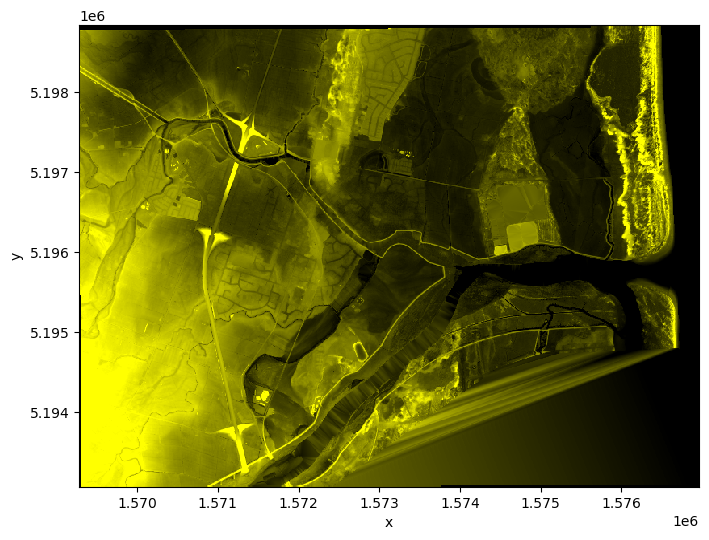

In [9]:
rgb(ds_time[0], bands=['zs_P0', 'zb_P0', 'u_P0'])

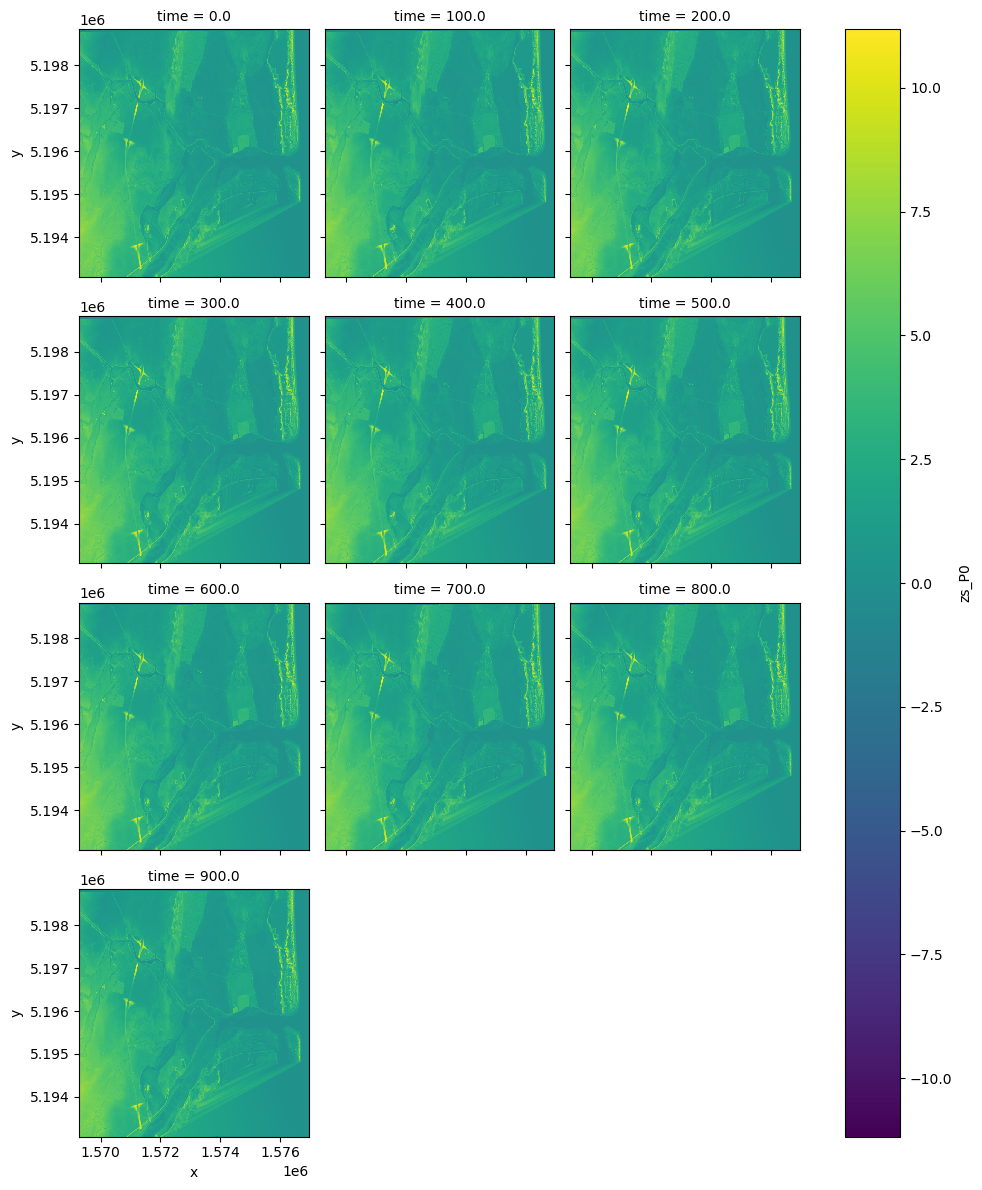

In [10]:
ds.zs_P0.plot(col="time", col_wrap=3, cmap="viridis")
plt.show()

In [3]:
output_path = pathlib.Path("/home/jovyan/datastorage/model_output/Output_7.nc")
print('The latest flood model output path:', output_path)

The latest flood model output path: /home/jovyan/datastorage/model_output/Output_7.nc


In [4]:
ds = xr.open_dataset(output_path)
ds

<xarray.Dataset>
Dimensions:      (time: 43, blockid: 2091, xx_P0: 656, yy_P0: 816)
Coordinates:
  * time         (time) float32 9.969e+36 600.0 1.2e+03 ... 2.46e+04 2.52e+04
  * blockid      (blockid) int32 0 1 2 3 4 5 6 ... 2085 2086 2087 2088 2089 2090
  * xx_P0        (xx_P0) float64 1.571e+06 1.571e+06 ... 1.577e+06 1.577e+06
  * yy_P0        (yy_P0) float64 5.192e+06 5.192e+06 ... 5.2e+06 5.2e+06
Data variables:
    blockxo      (blockid) float32 ...
    blockyo      (blockid) float32 ...
    blockwidth   (blockid) float32 ...
    blocklevel   (blockid) int32 ...
    blockstatus  (blockid) int32 ...
    h_P0         (time, yy_P0, xx_P0) float32 ...
    u_P0         (time, yy_P0, xx_P0) float32 ...
    v_P0         (time, yy_P0, xx_P0) float32 ...
    zs_P0        (time, yy_P0, xx_P0) float32 ...
    hmax_P0      (time, yy_P0, xx_P0) float32 ...
    zb_P0        (time, yy_P0, xx_P0) float32 ...
Attributes:
    maxlevel:  0
    minlevel:  0
    xmin:      1570595.0
    xmax:      1577155.0
    ymin:      5191995.0
    ymax:      5200155.0

In [5]:
x_min, x_max, y_min, y_max = (1570595.0, 1577155.0, 5191995.0, 5200155.0)
x = (x_min, x_max)
y = (y_min, y_max)
crs = 'EPSG:2193'
x, y = transform(Proj(crs), Proj('EPSG:4326'), y, x)
print(x, y)
display_map(x=y, y=x, margin=-0.8)

(-43.42435924021607, -43.351112315334454) (172.63672959374335, 172.71811165663996)


In [6]:
ds = ds.drop(['blockid', 'blockxo', 'blockyo', 'blockwidth', 'blocklevel', 'blockstatus'])
ds = ds.rename({'xx_P0':'x', 'yy_P0':'y'})
ds

<xarray.Dataset>
Dimensions:  (time: 43, x: 656, y: 816)
Coordinates:
  * time     (time) float32 9.969e+36 600.0 1.2e+03 ... 2.46e+04 2.52e+04
  * x        (x) float64 1.571e+06 1.571e+06 1.571e+06 ... 1.577e+06 1.577e+06
  * y        (y) float64 5.192e+06 5.192e+06 5.192e+06 ... 5.2e+06 5.2e+06
Data variables:
    h_P0     (time, y, x) float32 ...
    u_P0     (time, y, x) float32 ...
    v_P0     (time, y, x) float32 ...
    zs_P0    (time, y, x) float32 ...
    hmax_P0  (time, y, x) float32 ...
    zb_P0    (time, y, x) float32 ...
Attributes:
    maxlevel:  0
    minlevel:  0
    xmin:      1570595.0
    xmax:      1577155.0
    ymin:      5191995.0
    ymax:      5200155.0

In [3]:
output_path = pathlib.Path("/home/jovyan/datastorage/model_output/Output_8.nc")
ds.to_netcdf(output_path)

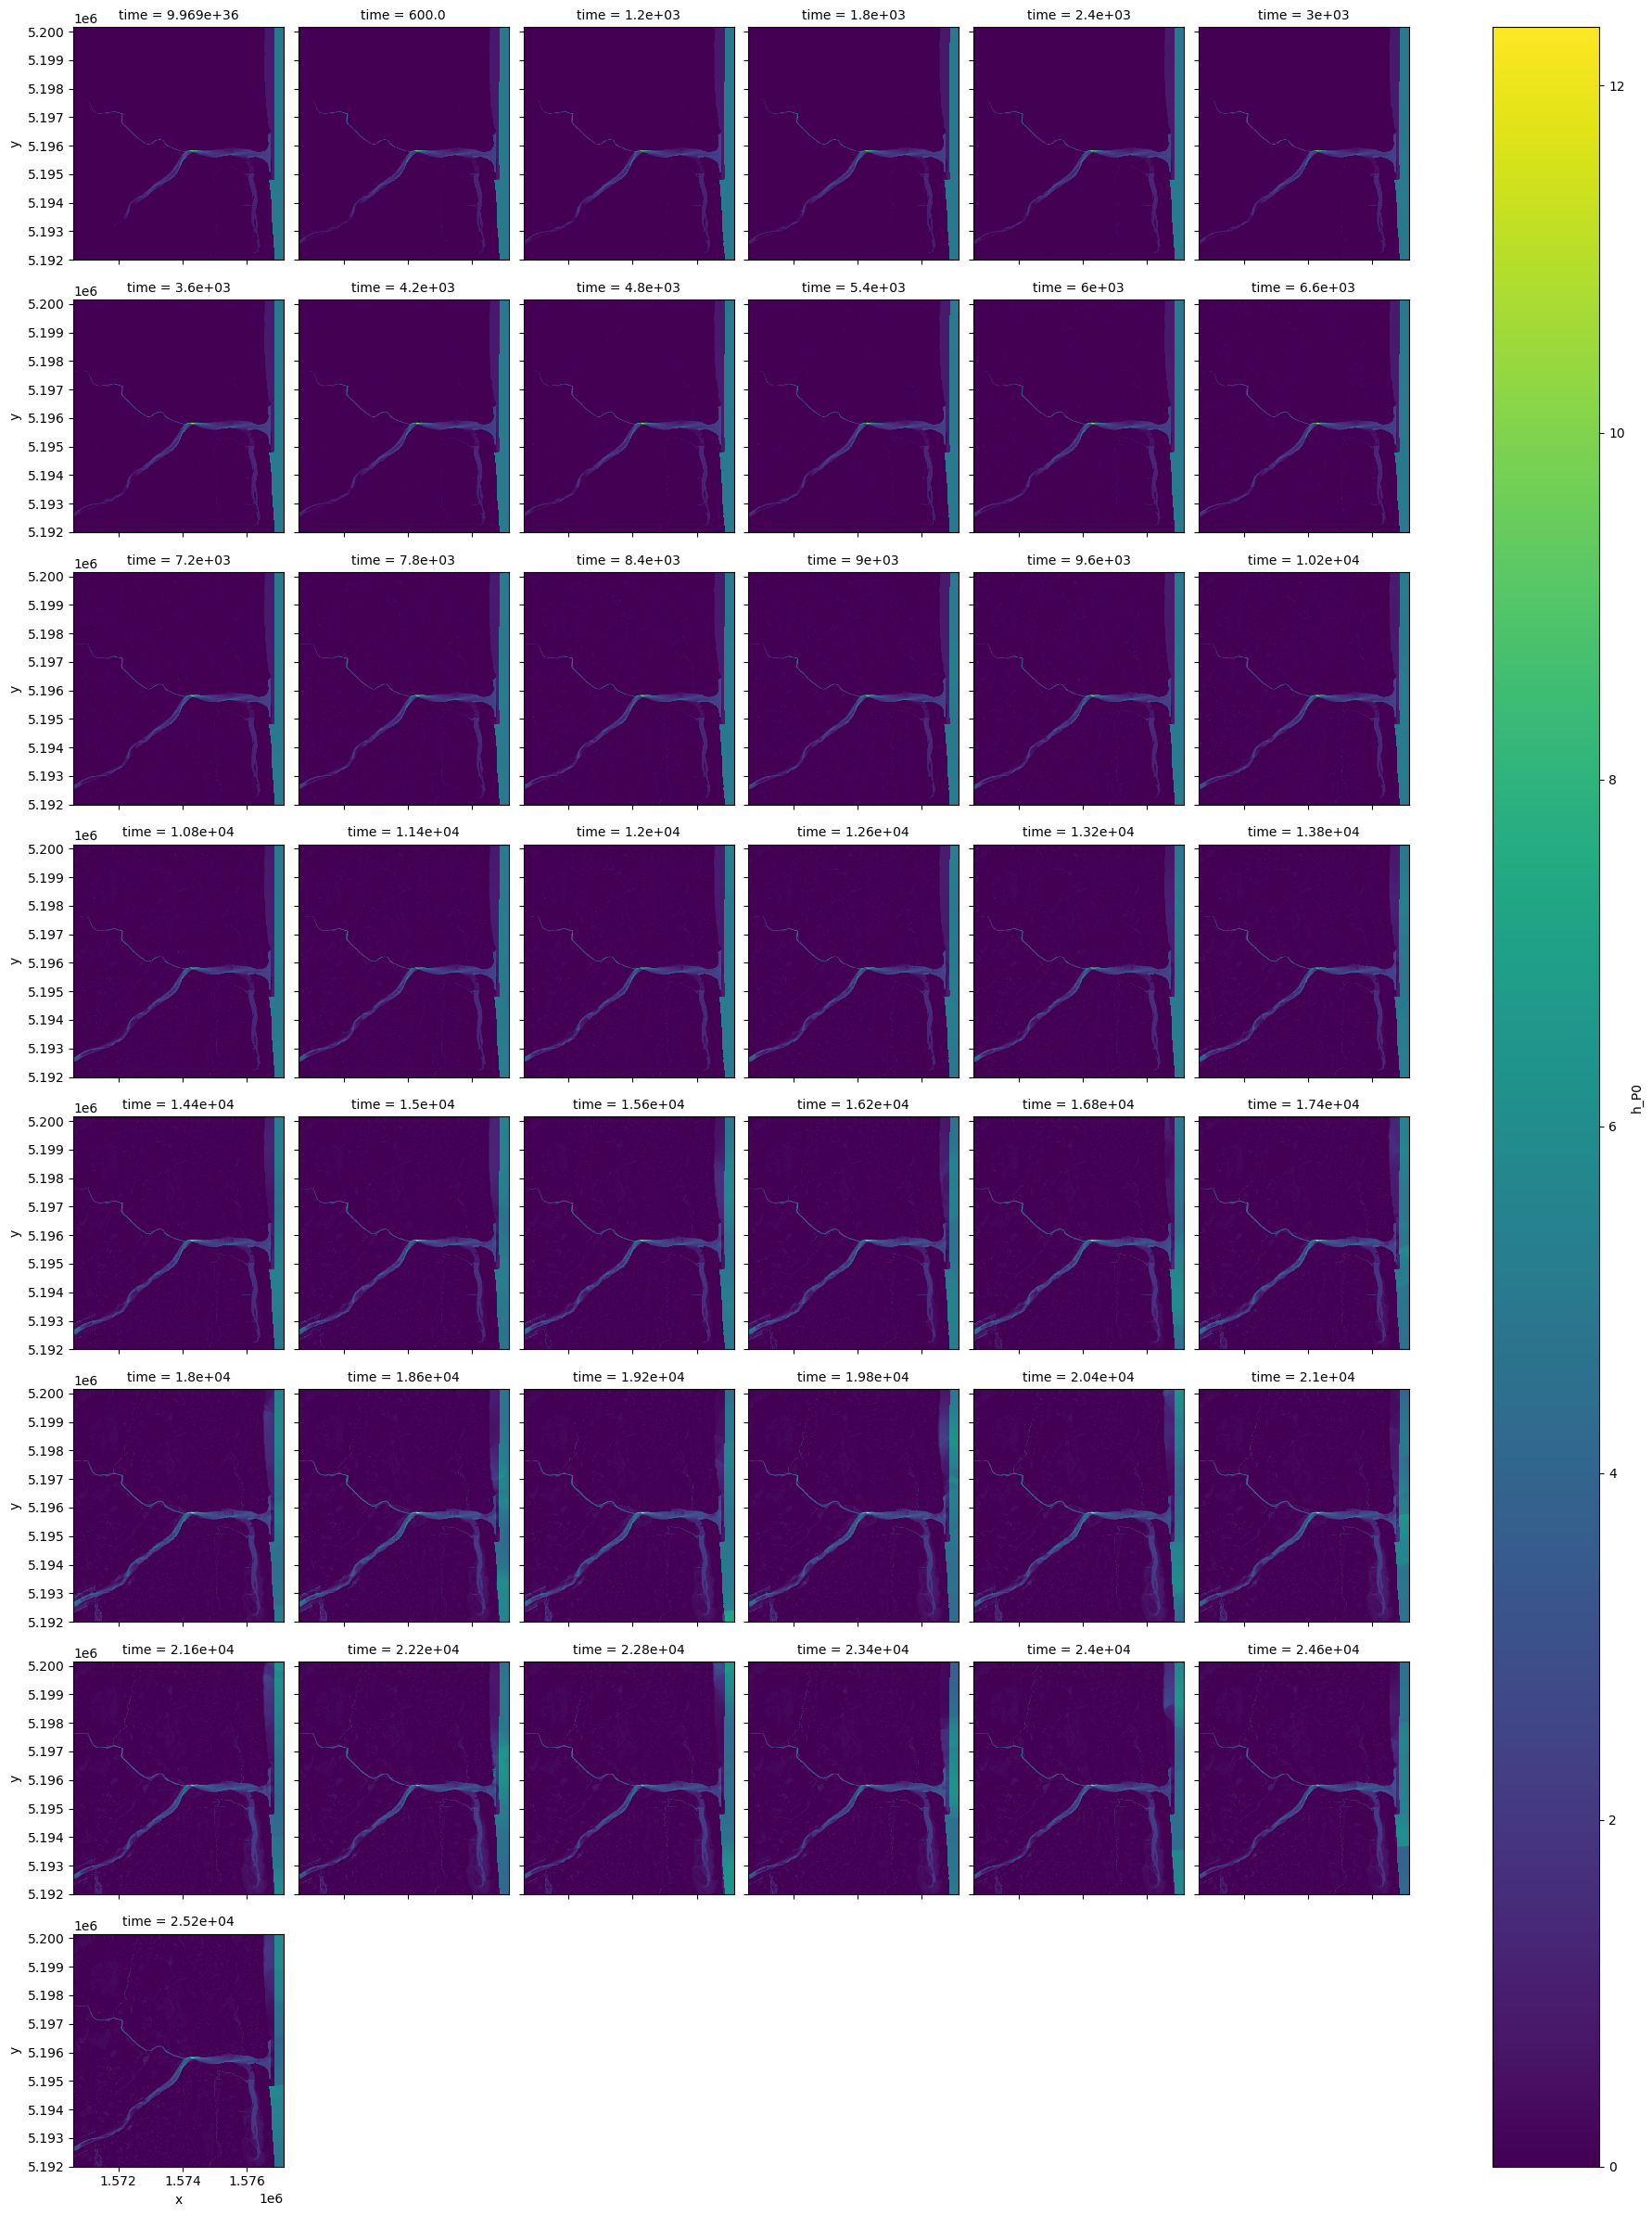

In [10]:
ds.h_P0.plot(col="time", col_wrap=6, cmap="viridis")
plt.show()

In [4]:
print('The latest flood model output path:', output_path)
ds = xr.open_dataset(output_path)
ds

The latest flood model output path: /home/jovyan/datastorage/model_output/Output_8.nc


<xarray.Dataset>
Dimensions:  (time: 43, x: 656, y: 816)
Coordinates:
  * time     (time) float32 9.969e+36 600.0 1.2e+03 ... 2.46e+04 2.52e+04
  * x        (x) float64 1.571e+06 1.571e+06 1.571e+06 ... 1.577e+06 1.577e+06
  * y        (y) float64 5.192e+06 5.192e+06 5.192e+06 ... 5.2e+06 5.2e+06
Data variables:
    h_P0     (time, y, x) float32 ...
    u_P0     (time, y, x) float32 ...
    v_P0     (time, y, x) float32 ...
    zs_P0    (time, y, x) float32 ...
    hmax_P0  (time, y, x) float32 ...
    zb_P0    (time, y, x) float32 ...
Attributes:
    maxlevel:  0
    minlevel:  0
    xmin:      1570595.0
    xmax:      1577155.0
    ymin:      5191995.0
    ymax:      5200155.0

In [5]:
! echo $output_path
! gdal_translate -a_srs 'EPSG:4326' -of netCDF $output_path $output_path

/home/jovyan/datastorage/model_output/Output_8.nc
Input file contains subdatasets. Please, select one of them for reading.


In [6]:
print('The latest flood model output path:', output_path)
ds = xr.open_dataset(output_path)
ds

The latest flood model output path: /home/jovyan/datastorage/model_output/Output_8.nc


<xarray.Dataset>
Dimensions:  (time: 43, x: 656, y: 816)
Coordinates:
  * time     (time) float32 9.969e+36 600.0 1.2e+03 ... 2.46e+04 2.52e+04
  * x        (x) float64 1.571e+06 1.571e+06 1.571e+06 ... 1.577e+06 1.577e+06
  * y        (y) float64 5.192e+06 5.192e+06 5.192e+06 ... 5.2e+06 5.2e+06
Data variables:
    h_P0     (time, y, x) float32 ...
    u_P0     (time, y, x) float32 ...
    v_P0     (time, y, x) float32 ...
    zs_P0    (time, y, x) float32 ...
    hmax_P0  (time, y, x) float32 ...
    zb_P0    (time, y, x) float32 ...
Attributes:
    maxlevel:  0
    minlevel:  0
    xmin:      1570595.0
    xmax:      1577155.0
    ymin:      5191995.0
    ymax:      5200155.0

In [7]:
base_path = os.path.dirname(output_path)

i = 0
print(pathlib.Path(f"{base_path}/datasets/dt_{i}.tif"))

_ = [ds['h_P0'].isel(time=i).rio.to_raster(pathlib.Path(f"{base_path}/datasets/dt_{i}.tif")) for i in range(0, 43)]


/home/jovyan/datastorage/model_output/datasets/dt_0.tif


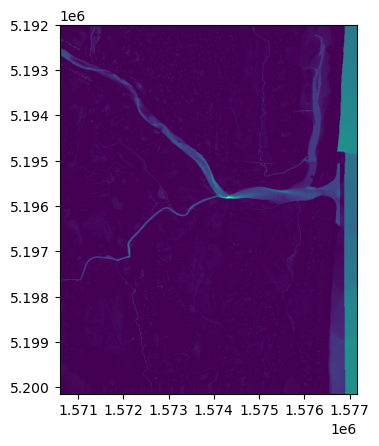

<AxesSubplot: >

In [8]:
import rasterio
from rasterio.plot import show
i = 42
fp = f'{base_path}/datasets/dt_{i}.tif'
img = rasterio.open(fp)
show(img)